## Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\Users\dibak\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\dibak\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Loading The Data & Initial overview

>> Removing NaN values & ploting important views



## What is our dataset consists of ?
<p>Our one of the goal is to see through the dataset</p>

<img src="money.jpeg" alt="Load">


<h3>Short description of the dataset:</h3>

* It has countries (some aggregation such as middle east, Africa Western and Central) and their GDP per capita in 2013 and 2023
* is


In [2]:
df = pd.read_csv("DS_project.csv")
df.head()

,Country Name,Country Code,GDP per capita2013,GDP per capita 2022,Happiness Index,Life expectancy,Average working hour(Weekly)
0,Aruba,ABW,26515.678080,28575.000000,NaN,76.90,40.0
1,Africa Eastern and Southern,AFE,1736.222507,1622.391720,NaN,NaN,NaN
2,Afghanistan,AFG,651.987862,363.700000,2.523,64.23,39.0
3,Africa Western and Central,AFW,2153.766138,1790.348800,NaN,71.19,NaN
4,Angola,AGO,5101.983876,2998.501158,NaN,63.24,44.0


In [3]:
## A glance of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country Name                  261 non-null    object 
 1   Country Code                  261 non-null    object 
 2   GDP per capita2013            261 non-null    float64
 3   GDP per capita 2022           261 non-null    float64
 4   Happiness Index               143 non-null    float64
 5   Life expectancy               190 non-null    float64
 6   Average working hour(Weekly)  193 non-null    float64
dtypes: float64(5), object(2)
memory usage: 14.4+ KB


In [4]:
df.describe()

,GDP per capita2013,GDP per capita 2022,Happiness Index,Life expectancy,Average working hour(Weekly)
count,261.000000,261.000000,143.000000,190.000000,193.000000
mean,16758.604823,18469.180063,5.518406,73.003737,41.549223
std,25398.283943,28252.884038,1.083971,7.641738,5.193035
min,241.547666,238.441876,2.523000,53.680000,25.000000
25%,1982.570293,2272.454739,4.843000,67.495000,38.000000
50%,6697.187683,7125.829235,5.477000,74.200000,41.000000
75%,19762.739620,21258.114140,6.206000,78.590000,45.000000
max,185055.487400,234316.000000,7.842000,85.830000,54.000000


## Let's see how money affects happiness

In [5]:
df_money_happiness = df.dropna().reset_index().drop("index", axis = 1)
df_money_happiness.head()

,Country Name,Country Code,GDP per capita2013,GDP per capita 2022,Happiness Index,Life expectancy,Average working hour(Weekly)
0,Afghanistan,AFG,651.987862,363.700000,2.523,64.23,39.0
1,Albania,ALB,4413.063397,6802.804519,5.117,78.06,43.0
2,United Arab Emirates,ARE,45729.607680,53757.863250,6.561,80.46,48.0
3,Argentina,ARG,13080.254730,13686.008670,5.929,77.98,34.0
4,Australia,AUS,68156.386100,64491.429890,7.183,83.73,32.0


### Let's look the relationship between `GDP per capita` and `happiness index`

In [6]:
mean_happiness = df_money_happiness["Happiness Index"].mean()
mean_gdp_per_capita = df_money_happiness["GDP per capita 2022"].mean()
india_gdp = 2388.621198
india_happiness = 3.819
india_weekly_hour = 48
india_lifeExpectancy = 72.03

Text(2388.621198, 3.819, 'India')

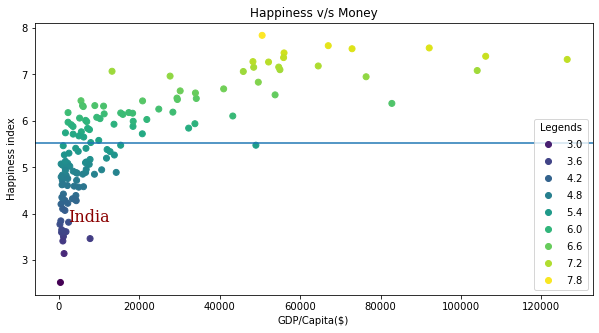

In [7]:
fig,ax=plt.subplots(figsize=(10,5))
abc= ax.scatter(x = df_money_happiness["GDP per capita 2022"],y = df_money_happiness["Happiness Index"],c=df_money_happiness["Happiness Index"]);
ax.set(xlabel="GDP/Capita($)",ylabel="Happiness index",title="Happiness v/s Money");
ax.legend(*abc.legend_elements(),title="Legends");
ax.axhline(mean_happiness);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
ax.text(india_gdp,india_happiness,"India", fontdict=font)

#### Let's explore the Pearson's correlation between happiness index and GDP per capita



The Pearson's correlation coefficient formula is given by:

\begin{equation}
r = \frac{\sum{(x_i - \bar{x})(y_i - \bar{y})}}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}}
\end{equation}



In [8]:
df_money_happiness.drop(["Country Name", "Country Code"], axis = 1).corr()

,GDP per capita2013,GDP per capita 2022,Happiness Index,Life expectancy,Average working hour(Weekly)
GDP per capita2013,1.000000,0.970589,0.719962,0.664753,-0.459677
GDP per capita 2022,0.970589,1.000000,0.723364,0.668580,-0.450802
Happiness Index,0.719962,0.723364,1.000000,0.761003,-0.485882
Life expectancy,0.664753,0.668580,0.761003,1.000000,-0.374209
Average working hour(Weekly),-0.459677,-0.450802,-0.485882,-0.374209,1.000000


##### As we can see the pearson's coefficient between GDP per capita and happiness index is really high more specifically `0.723364	`

so in some sense:
   <img src="yes_money.jpeg" alt="Load">
 

In [9]:
#df_money_happiness.to_csv("DS_project_new.csv",index = False)

### Let's take a look at relationship between `Average working hour(Weekly)` && `Happiness`

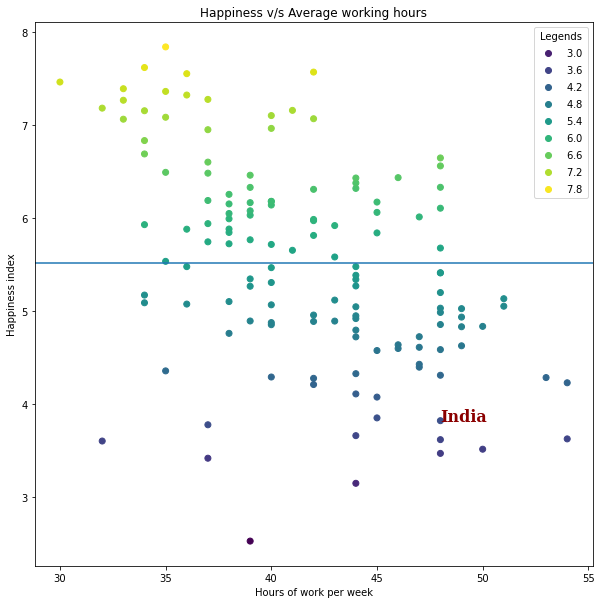

In [10]:
fig,ax=plt.subplots(figsize=(10,10))
abc= ax.scatter(x = df_money_happiness["Average working hour(Weekly)"],y = df_money_happiness["Happiness Index"],c=df_money_happiness["Happiness Index"]);
ax.set(xlabel="Hours of work per week",ylabel="Happiness index",title="Happiness v/s Average working hours");
ax.legend(*abc.legend_elements(),title="Legends");
ax.axhline(mean_happiness);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }
ax.text(india_weekly_hour,india_happiness,"India", fontdict=font);

#### As we can see the pearson's coefficient between Weekly working hour and happiness index is relatively high more specifically `-0.485882`

so we can have another hypothesis that burn out is one of the main reason of unhappiness:
         <img src="work.jpg" alt="Load">


### We also curious to know if the happiness has locality property
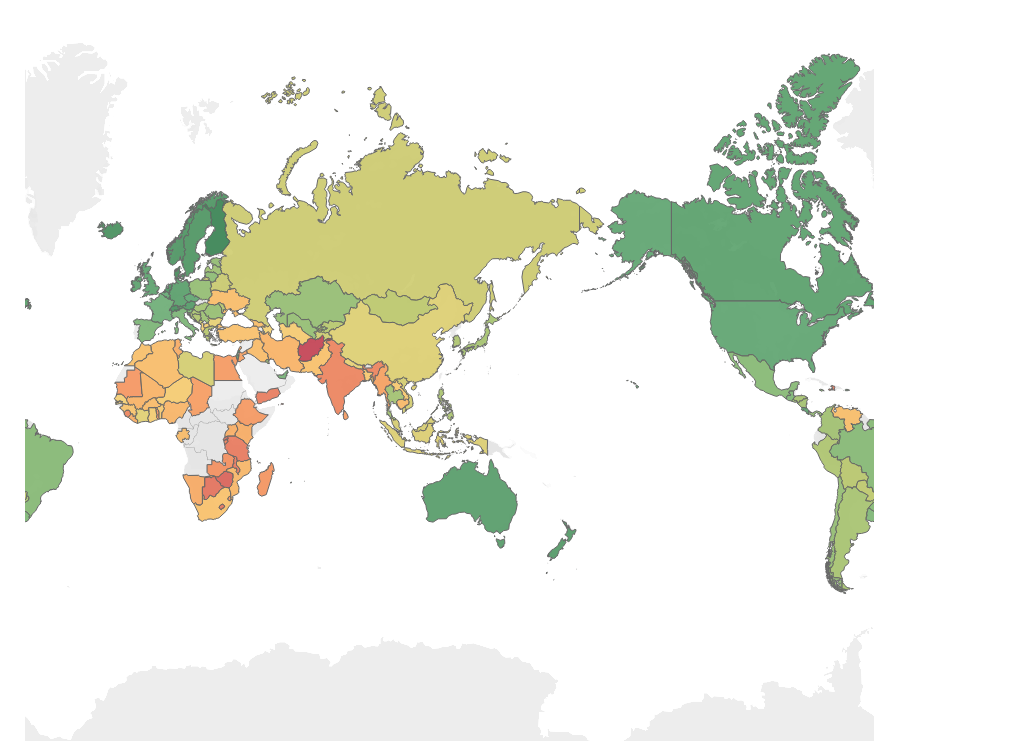
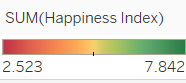


### Using Tableau

### Regional Disparities in Global Happiness Index

* In the realm of socio-economic indicators, the Global Happiness Index stands as a potent barometer, reflecting the overall well-being and contentment levels within nations. Analyzing this index on a geographical scale offers a compelling narrative about the world’s regional disparities in happiness.

* Upon mapping the Global Happiness Index data, a discernible trend emerges: Europe and North America consistently exhibit higher happiness scores, underlining the advanced social welfare systems, economic stability, and overall quality of life prevalent in these regions. Countries in Western Europe, the Nordic region, and North America consistently rank high, portraying a shared affluence in happiness.

* Conversely, the Indian subcontinent and vast parts of Africa appear conspicuously subdued in this global happiness panorama. Nations in these regions often grapple with challenges such as poverty, political instability, and limited access to essential resources, contributing to a significant gap in happiness levels when compared to the global average.

* Geospatial visualization not only accentuates these disparities but also serves as a potent tool for policy-makers, enabling them to discern the happiness landscape at a glance. Understanding these regional discrepancies becomes paramount for international organizations and governments, guiding targeted interventions and policy reforms aimed at uplifting the quality of life in regions lagging behind.

>> In conclusion, the geospatial representation of the Global Happiness Index underscores the stark contrast in well-being across continents. It illuminates not only the triumphs but also the challenges faced by nations, spotlighting the imperative need for concerted efforts towards fostering happiness, social equity, and prosperity, especially in regions where it remains elusive. Harnessing the power of geospatial data analysis continues to be instrumental in steering the course toward a more balanced and contented global society.

## Now let's look into exceptionally performing and low performing countries

Steps to find Interquartile range(IQR)

Sort the given dataset in ascending order


Q_1 = \begin{cases}
\text{Median of the lower half of the data} & \text{if the number of observations is odd} \\
\text{Average of the two middle values of the lower half} & \text{if the number of observations is even}
\end{cases} \\


Q_3 = \begin{cases}
\text{Median of the upper half of the data} & \text{if the number of observations is odd} \\
\text{Average of the two middle values of the upper half} & \text{if the number of observations is even}
\end{cases} \\


IQR = Q_3 - Q_1


In [11]:
happiness_list = df_money_happiness["Happiness Index"]
happiness_list = list(happiness_list)

In [12]:
happiness_list.sort()
number_data_points = len(happiness_list)
middle_point = number_data_points//2 + 1
Q1 = (happiness_list[68//2] + happiness_list[(68//2) + 1])/2
Q3 = (happiness_list[69 + 68//2] + happiness_list[(69 + 68//2) + 1])/2
interquartile_range = Q3 - Q1
minimum = Q1 - 1.5*interquartile_range
print(f"The interquartile range is {interquartile_range}")
print(f"So the maximum bound is {Q3 + 1.5*interquartile_range}")
print(f"So the minimum bound is {Q1 - 1.5*interquartile_range}")

The interquartile range is 1.4820000000000002
So the maximum bound is 8.537
So the minimum bound is 2.6089999999999995


In [13]:
df_money_happiness[df_money_happiness["Happiness Index"] < minimum]["Country Name"]

0    Afghanistan
Name: Country Name, dtype: object

#### So we can see that Afganistan is the only country having lower than the accepted value of happiness for outlier.
Political instability is one of the main causes of  lowe happiness index as we have seen earlier and this example supports our claim

#### Show using box plot

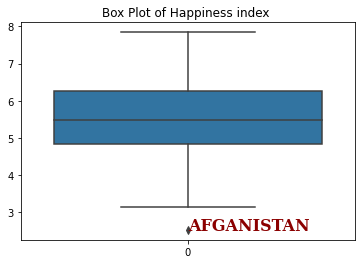

In [14]:
sns.boxplot(data=happiness_list)
plt.title('Box Plot of Happiness index ')

plt.text(x = 0, y= 2.523, s = "AFGANISTAN", fontdict=font);

#### Here we can also see the one outlier that is `Afganistan`

### Happiness affects the life expectancy ??


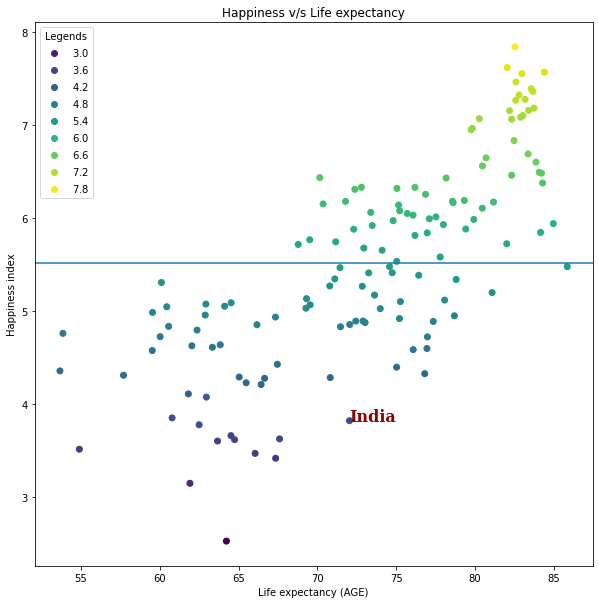

In [15]:
fig,ax=plt.subplots(figsize=(10,10))
abc= ax.scatter(x = df_money_happiness["Life expectancy"],y = df_money_happiness["Happiness Index"],c=df_money_happiness["Happiness Index"]);
ax.set(xlabel="Life expectancy (AGE)",ylabel="Happiness index",title="Happiness v/s Life expectancy");
ax.legend(*abc.legend_elements(),title="Legends");
ax.axhline(mean_happiness);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }
ax.text(india_lifeExpectancy, india_happiness,"India", fontdict=font);

### Now let's see the relationship of `GDP per capita`, `Life expectancy`, `Average working hours` against `Happiness Index`

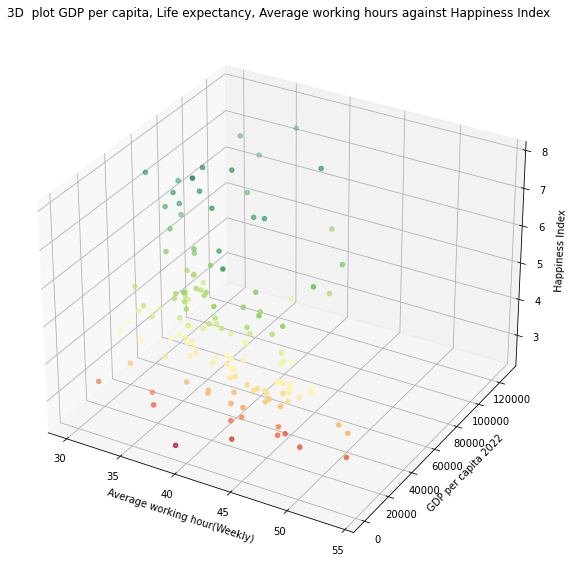

In [16]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ='3d')
 
z = list(df_money_happiness["Happiness Index"])
x = list(df_money_happiness["Average working hour(Weekly)"])
y = list(df_money_happiness["GDP per capita 2022"])
 
ax.set_xlabel('Average working hour(Weekly)')
ax.set_ylabel('GDP per capita 2022')
ax.set_zlabel('Happiness Index')
    

ax.scatter3D(x, y, z,c=z, cmap='RdYlGn')
ax.set_title('3D  plot GDP per capita, Life expectancy, Average working hours against Happiness Index')
plt.show()


### for visulization let's apply PCA

In [17]:
df_with_data = df_money_happiness.drop(["Country Name", "Country Code", "GDP per capita2013"], axis = 1)
df_with_data

,GDP per capita 2022,Happiness Index,Life expectancy,Average working hour(Weekly)
0,363.700000,2.523,64.23,39.0
1,6802.804519,5.117,78.06,43.0
2,53757.863250,6.561,80.46,48.0
3,13686.008670,5.929,77.98,34.0
4,64491.429890,7.183,83.73,32.0
...,...,...,...,...
132,4163.514300,5.411,74.74,48.0
133,676.928385,3.658,64.52,44.0
134,6776.480077,4.956,62.89,42.0
135,1487.907764,4.073,62.96,45.0


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [19]:
scaling=StandardScaler()
 
# Use fit and transform method 
scaling.fit(df_with_data)
Scaled_data=scaling.transform(df_with_data)
 

pca = PCA(n_components=2)
pca.fit(Scaled_data)
x = pca.transform(Scaled_data)
x.shape

C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


(137, 2)

### Let's see whether there is any two principle components

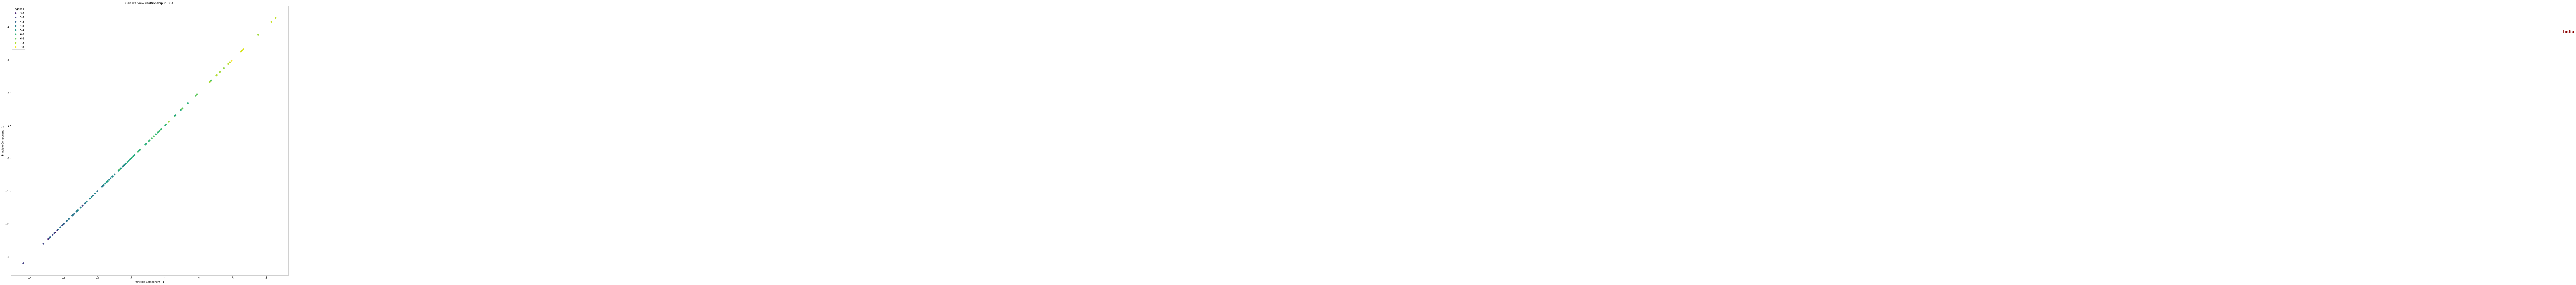

In [20]:
fig,ax=plt.subplots(figsize=(20,20))
abc= ax.scatter(x = x[:, 0],y = x[ :, 0],c=df_money_happiness["Happiness Index"]);
ax.set(xlabel="Principle Component - 1",ylabel="Principle Component - 1",title="Can we view realtionship in PCA");
ax.legend(*abc.legend_elements(),title="Legends");
#ax.axhline(mean_happiness);

ax.text(india_lifeExpectancy, india_happiness,"India", fontdict=font);

### KMEANS clustering - to see the clusters of alike countries in terms of Happiness and Average working and GDP per capita

In [21]:
from sklearn.cluster import KMeans

NUMBER_OF_CLUSTER = 3 ## I segregate countries in 3 parts 1. Highly happy, moderately happy, unhappy

kmeans = KMeans(n_clusters= NUMBER_OF_CLUSTER)

label = kmeans.fit_predict(df_with_data.drop(["Happiness Index", "Life expectancy"], axis = 1))

#label

C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


Text(2388.621198, 48, 'India')

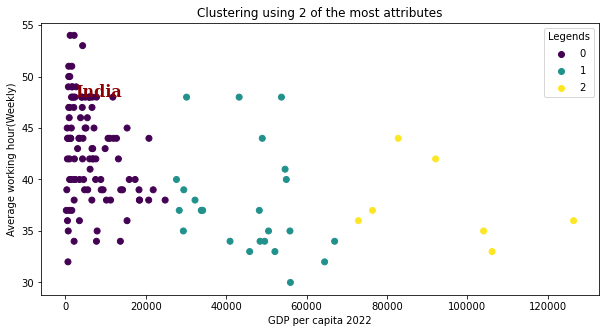

In [22]:
fig,ax=plt.subplots(figsize=(10,5))
abc= ax.scatter(x = df_with_data["GDP per capita 2022"],y = df_with_data["Average working hour(Weekly)"],c= label);
ax.set(xlabel="GDP per capita 2022",ylabel="Average working hour(Weekly)",title="Clustering using 2 of the most attributes");
ax.legend(*abc.legend_elements(),title="Legends");
ax.text(india_gdp, india_weekly_hour, "India", fontdict=font)

### So our findings

* India, a nation of vibrant diversity and rich cultural heritage, grapples with a paradox that influences the well-being of its citizens—the confluence of long working hours and relatively low income levels. This intricate interplay significantly impacts India's happiness index, reflecting a nuanced societal narrative. 

* India, one of the world's fastest-growing economies, boasts a burgeoning workforce characterized by relentless dedication. According to the International Labour Organization, the average weekly working hours in India often exceed the global norm, with many individuals toiling for extended periods to make ends meet. This phenomenon is compounded by the stark income disparity prevalent across the country. Despite economic growth, a substantial portion of the population earns meager wages, struggling to fulfill their basic needs and aspirations.

* The ramifications of this scenario on the happiness index are profound. Prolonged working hours lead to chronic stress, fatigue, and diminished work-life balance, eroding the overall quality of life. Moreover, the palpable disparity between labor input and financial rewards fosters discontent and disillusionment among the workforce, hindering their sense of fulfillment and life satisfaction.

* Social and economic policies play a pivotal role in addressing this issue. Investments in education and skill development can empower the workforce, enhancing their employability and earning potential. Furthermore, initiatives aimed at promoting decent work conditions, equitable wages, and a balanced work-life equilibrium are imperative. Addressing these fundamental aspects can mitigate the adverse effects of long working hours and low income, fostering a happier and more contented society.

* In essence, India's happiness index reflects the intricate interplay of its citizens' dedication, economic realities, and societal disparities. By fostering an environment that values the well-being of its workforce and ensures equitable opportunities, India can pave the way for a brighter, more prosperous, and ultimately happier future for its people.

### So is the mental health of Indian students

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [24]:
df_suicide = pd.read_csv("Suicides in India 2001-2012.csv")
df_suicide_text = df_suicide["Type"]
df_suicide_text

0                              Illness (Aids/STD)
1         Bankruptcy or Sudden change in Economic
2         Cancellation/Non-Settlement of Marriage
3               Physical Abuse (Rape/Incest Etc.)
4                                   Dowry Dispute
                           ...                   
237514                                  Seperated
237515                            Widowed/Widower
237516                                    Married
237517                                   Divorcee
237518                              Never Married
Name: Type, Length: 237519, dtype: object

In [25]:
text = ' '.join(df_suicide["Type"].astype(str))


### The `WORD CLOUD`  shows what are the frequent reason and way of suicide



<img src="wordcloud.png" alt="Load">

>> So it is pretty visible that Our countries main reason low happiness index is GDP per capita and skewed work life balance

### No let's look to how IIITDM students reaction rates their mental health(On scale of 1-5 where, better the number -> better the mental health) and 
what is the main reason for mental health disturbance in college:
* 1. Loneliness
* 2. Work pressure
* 3. Mess-Food
* 4. Personal life
* 5. Others

In [26]:
df_survey = pd.read_csv("IIITDM_SURVEY.csv")
df_survey.head()

,Rating,Type
0,3,4
1,2,2
2,4,4
3,3,3
4,3,2


<Figure size 720x360 with 0 Axes>

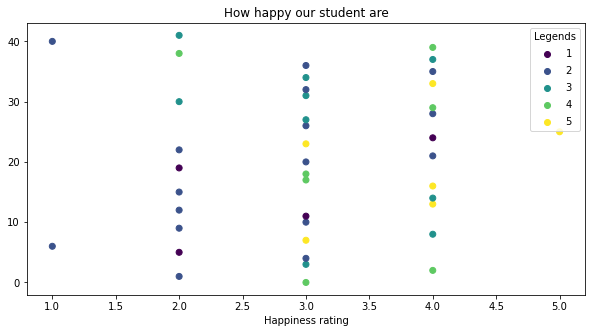

In [27]:
rating = df_survey["Rating"]
fig = plt.figure(figsize = (10, 5))

values = [i for i in range(len(rating))]
# creating the bar plot
fig,ax=plt.subplots(figsize=(10,5))
abc= ax.scatter(x = df_survey["Rating"],y = values,c=df_survey["Type"]);
ax.set(xlabel="Happiness rating",ylabel="",title="How happy our student are");
ax.legend(*abc.legend_elements(),title="Legends");



### Let's see what is most common reason for not being happy

In [28]:
def most_frequent(List):
    val =  max(set(List), key = List.count)
    if val == 1:
        print("Most dis-satisfaction comes from loneliness")
    elif val == 2:
        print("Most dis-satisfaction comes from work-pressure")
    elif val == 3:
        print("Most dis-satisfaction comes from Mess Food")
    elif val == 4:
        print("Most dis-satisfaction comes from Personal life")
    elif val == 5:
        print("Most dis-satisfaction comes from something else {Not listed}")
 
List = list(df_survey["Type"])
most_frequent(List)


Most dis-satisfaction comes from work-pressure


### So we can see here in academics the work-pressure is one of the most reason for dis-satisfaction with life

#### Countries having high education quality index (top 15)
* 1	Germany	0.94	 
* 2	Finland	0.93	 
* 3	Iceland	0.93	 
* 4	New Zealand	0.93	 
* 5	Norway	0.93
* 6	United Kingdom	0.93	
* 7	Australia	0.92	
* 8	Denmark	0.92	
* 9	Ireland	0.92	
* 10	Singapore		
* 11	Sweden	0.92	
* 12	Netherlands	0.91	
* 13	Slovenia	0.91	
* 14	Belgium	0.9	
* 15	Lithuania	0.9	

It also the case that the above mentioned countries have high happiness index so the Education system also need to be considered when looking into coutries Happiness

### Let's build a model that predicts the happiness index given the average working hour & GDP per capita

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df_with_data.drop(["Happiness Index"], axis = 1)
y = df_with_data["Happiness Index"]

x_train, x_test, y_train, y_test = train_test_split(X, y)

In [40]:
rf_clf = RandomForestRegressor()
rf_clf.fit(x_train, y_train)

C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


RandomForestRegressor()








The \( R^2 \) score is calculated using the following formula:
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}






In [41]:
print(f"R^2 score for test portion of the datset is : {rf_clf.score(x_test, y_test)}")

R^2 score for test portion of the datset is : 0.589402954116325


C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


#### finding MSE error

In [49]:
import numpy as np
def mse(y1, y2):
    return np.power(y1 -y2, 2)

def MSE_calculation(y_test, x_test,model):
    y_pred = model.predict(x_test)
    cal = 0
    for i in range(len(y_test)):
        cal += mse(y_test[i], y_pred[i])
    return cal/len(y_test)    

In [55]:
MSE_VAL = MSE_calculation(list(y_test), x_test, rf_clf)
print(f"The MSE value is {MSE_VAL}")

The MSE value is 0.4665177611857137


C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


### Mean absolute error

In [60]:
def MAD(y1, y2):#Mean absolute difference
    return np.absolute(y1 - y2)
def MAD_calculation(y_test, x_test,model):
    y_pred = model.predict(x_test)
    cal = 0
    for i in range(len(y_test)):
        cal += MAD(y_test[i], y_pred[i])
    return cal/len(y_test)  

In [63]:
MAD_VAL = MAD_calculation(list(y_test), x_test, rf_clf)
print(f"The MAD value is {MAD_VAL : 0.2f}")

The MAD value is  0.55


C:\Users\dibak\anaconda3\lib\site-packages\sklearn\utils\validation.py:571: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
